In [1]:
from eventio import SimTelFile
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import dates
import matplotlib.pyplot as plt
import time
from pathlib import Path
from scipy.optimize import curve_fit
import pickle as pkl
import sys
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

import DBscan_on_simtel_data as dbs 

In [2]:
def save_hist( hist, fileName):
    binl=np.pad(hist[1].copy(), pad_width=1)
    binr=np.pad(hist[1].copy(), pad_width=1)
    binr=np.roll(binr, shift=1,axis=0)
    #print(binr)
    binc=binl+(binr-binl)/2.0
    binc=binc[2:-1]
    print(hist)
    print(binc[2:-1])
    print(len(binc))
    print(len(hist[0]))
    df = pd.DataFrame({'binc': binc, 
                       'energy': hist[0]})
    df.to_csv(fileName,sep=' ',index=False)

In [3]:
datafilein='../scratch/simtel_data/NSB268MHz/data/corsika_run1.simtel.gz'
outHistFileName='hist_wf_val_NSB268MHz.csv'
#datafilein='../scratch/simtel_data/NSB386MHz/corsika_run1.simtel.gz'
#outHistFileName='hist_wf_val_NSB386MHz.csv'
#
nevmax = 1000

In [4]:
dbs.print_ev_first_ID(datafilein,1)

event_id          100


In [5]:
dbs.print_ev_info(datafilein,108)

----------------------------------
event_id          108
energy            0.01571020483970642
xcore             793.7481079101562
ycore             1220.1619873046875
ev_time           14.6484375
nphotons          0
n_pe              0
n_pixels          0
wfshape           (7987, 75)
type              <class 'numpy.ndarray'>
typeadc           <class 'numpy.uint16'>
----------------------------------


In [6]:
sf = SimTelFile(datafilein)
wf = np.array([], dtype=np.uint16)
it_cout = 0
#
tic = time.time()
toc = time.time()
#
it_cout=0
#
wf_l=[]
#
for ev in sf:
    #
    if int(ev['photoelectrons'][0]['n_pe']) == 0 :
        wf=ev['telescope_events'][1]['adc_samples'][0]
        wfp=wf.copy()
        #
        wf_l.append(wfp)
        #
        if (it_cout%100==0) :            
            toc = time.time()
            print('{:10d} {:10.2f} s'.format(it_cout, toc - tic))
            tic = time.time()
        it_cout = it_cout + 1
        if (it_cout >= nevmax and nevmax > 0):
            break
#
#
wf_tot=np.concatenate(([wfs.reshape((wfs.shape[0],wfs.shape[1],1)) for wfs in wf_l]), axis=2)
print(type(wf_tot))
print(wf_tot.shape)

         0       0.01 s
       100       0.74 s
       200       0.73 s
       300       0.72 s
       400       0.72 s
       500       0.71 s
       600       0.78 s
       700       0.75 s
       800       0.76 s
       900       0.72 s
<class 'numpy.ndarray'>
(7987, 75, 1000)


In [7]:
wf_tot=wf_tot.flatten()

In [8]:
print('mean ',np.mean(wf_tot))
print('std  ',np.std(wf_tot))

mean  299.9957135895831
std   7.835065408643602


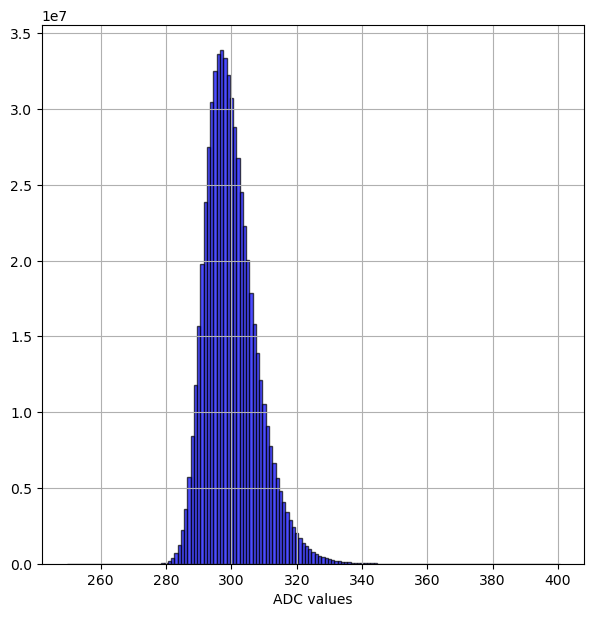

In [12]:
fig, ax01 = plt.subplots(figsize=(7,7))

hist_wf_val=ax01.hist( wf_tot.flatten(), bins=np.linspace(249.5,400.5,int(400.5-249.5+1)), alpha=0.7, color='b', edgecolor='black', density=False)

ax01.set(xlabel='ADC values', ylabel='');
#
ax01.yaxis.grid(True)
ax01.xaxis.grid(True)
#ax01.set_yscale('log')

#ax01.set_xlim(2,16)
#ax01.set_ylim(1,2*1e+5)


# Add mean and std annotations
#plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']), color='r', linestyle='dashed', linewidth=2)
#plt.text(12.0, 2.2e+4, f'Mean: {np.mean(df_nsb_['digitalsum_points_rate']):.2f} GHz', color='k')

# Add mean and std annotations
#plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']) + 2*np.std(df_nsb_['digitalsum_points_rate']), 
#            color='k', linestyle='dashed', linewidth=2)
#plt.axvline(np.mean(df_nsb_['digitalsum_points_rate']) - 2*np.std(df_nsb_['digitalsum_points_rate']), 
#            color='k', linestyle='dashed', linewidth=2)
#plt.text(12.0, 1.2e+4, f'Std: {np.std(df_nsb_['digitalsum_points_rate']):.2f} GHz', color='k')

plt.show()

In [10]:
save_hist( hist=hist_wf_val, fileName=outHistFileName)

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 5.0000000e+00, 8.0000000e+00, 6.1000000e+01,
       1.9500000e+02, 6.2100000e+02, 1.7650000e+03, 4.7710000e+03,
       1.2900000e+04, 3.1901000e+04, 7.5592000e+04, 1.6593900e+05,
       3.4597700e+05, 6.8147500e+05, 1.2597630e+06, 2.2034690e+06,
       3.6414360e+06, 5.6900900e+06, 8.4168000e+06, 1.1778654e+07,
       1.5660564e+07, 1.9790046e+07, 2.3839223e+07, 2.7492528e+07,
       3.0436161e+07, 3.2493833e+07, 3.3621657e+07, 3.3873111e+07,
       3.3365950e+07, 3.2260446e+07, 3.0725728e+07, 2.8849410e+07,
       2.6763884e+07, 2.4553853e+07, 2.2289741e+07, 2.0033863e+07,
       1.7862977e+07, 1.5800754e+07, 1.3874277e+07, 1.2116983